# EDA Dengue DataSet

In [1]:
# Import essentials
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# load the csv
train_values_df = pd.read_csv('dengue_features_train.csv') # Load the `train` file
train_labels_df = pd.read_csv('dengue_labels_train.csv') # Load the `train` file
test_values_df = pd.read_csv('dengue_features_test.csv') # Load the `train` file

#store the original dimensions
len_train=train_values_df.shape[0]
len_test=test_values_df.shape[0]

In [3]:
train_labels_df.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [4]:
train_values_df.tail(2)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0
1455,iq,2010,25,2010-06-25,0.298186,0.232971,0.274214,0.315757,63.22,298.097143,...,36.90,89.082857,63.22,17.355714,11.014286,27.475000,9.900000,33.7,22.2,20.4


In [5]:
print('length of train: ', len_train)
print('length of test: ',len_test)

length of train:  1456
length of test:  416


In [6]:
test_values_df.head(2)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.0189,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.0124,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3


In [7]:
train_values_df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [8]:
test_values_df.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [9]:
features_all = train_values_df.columns.tolist()
print(features_all)
print(len(features_all))

['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm']
24


In [10]:
train_values_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

# Feature Engineering (missing Nans, etc)

1. primer ho ajuntem tot en un dataframe i aixi ja podem treballar sobre test i train

In [11]:
train= pd.concat([train_values_df, train_labels_df['total_cases']], axis=1, sort=False)
test_values_df['total_cases']=np.nan

In [12]:
train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [13]:
print (train.shape)
print (test_values_df.shape)

(1456, 25)
(416, 25)


In [14]:
df_TOTAL = pd.concat([train, test_values_df]).reset_index(drop=True)
df_TOTAL.tail()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
1867,iq,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,...,89.990000,41.12,17.185714,10.100000,27.40,9.050,32.6,21.8,33.0,NaN
1868,iq,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,...,93.891429,71.52,17.448571,9.657143,27.52,10.720,33.8,21.4,68.0,NaN
1869,iq,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,...,94.967143,78.96,16.410000,7.385714,27.20,10.075,32.6,21.6,93.2,NaN
1870,iq,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,...,89.057143,39.54,15.137143,8.228571,26.70,8.480,32.2,21.8,34.1,NaN
1871,iq,2013,26,2013-06-25,0.339467,0.240071,0.356943,0.273600,51.80,297.372857,...,87.030000,51.80,16.148571,11.542857,27.35,9.675,32.6,22.0,14.9,NaN


In [15]:
# posem les dates en format de dates
df_TOTAL['Date_Start_week'] =  pd.to_datetime(df_TOTAL['week_start_date'], format='%Y-%m-%d')

### fins aqui: 
1. totes les dades son floats, excepte el dia week_start_date (data), city i any-weekofyear (int).
2. Algunes variables tenen NaN --> haurem d'imputar dades (tant al train com al test).Millor ajuntar-ho tot i fer el missing data imputattion a tot.
3. Al imputar NaNs hemde tenir en compte que tenim dos ciutats diferents, amb dos ¿patrons diferents de clima?
4. Obrsevacions + dades reanalisis? podem fer servir el reanalisis per omplir Nans? 
4. 24 columnes, 1456 dades al train i 416 al test.

#### Les variables son:

1. ndvi: Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements (cada una Pixel southeast (la se) of city centroid, notheast, ...)
2. station: NOAA's GHCN daily climate data weather station measurements
3. reanalysis: NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)

#### per tant, de reanalysis i station: 
1. en les station, la rang en teoria es la diferencia diurna entre maxima i minima (pero sembla tenen NaNs en diferents punts.) Al ser rang diurn no podem inferir-la de la minima-maxima del dia
2. les **station_avg_temp_c** (43 NaNs) i **reanalysis_air_temp_k donen info semblant** (10NaNs) (mean average temp), podem fer servir una per predir l'altre. Veur ecom perque en algun moment falten dades.
3. **station_max_temp_c (i min)** i **reanalysis_max_air_temp_k (i min)** en teoria son el mateix, reomplim dades a partir d'elles? no tan facil....
    * estaria be veure si hi ha algun biaix entre aquestes, i per tant potser fer servir una regressio lineal? no simplement el valor del reanalysis..?(seria lo facil)
4. per precipitation, en tenim 3: station_precip_mm, reanalysis_sat_precip_amt_mm, precipitation_amt_mm


## Anem a mirar com estan els NaNs i veiem que podem fer per millorar-ho
### Ho mirem separant les ciutats, 

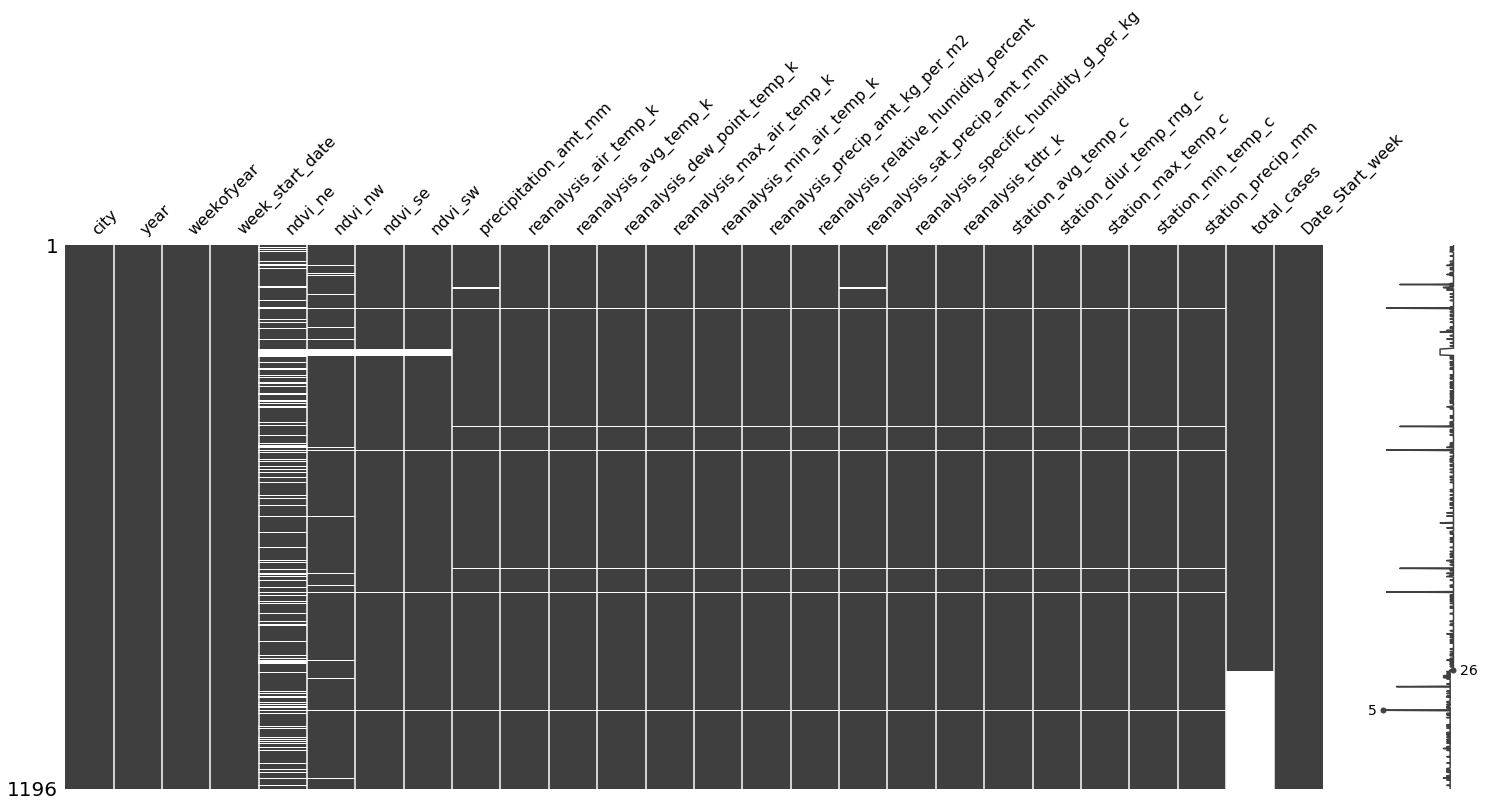

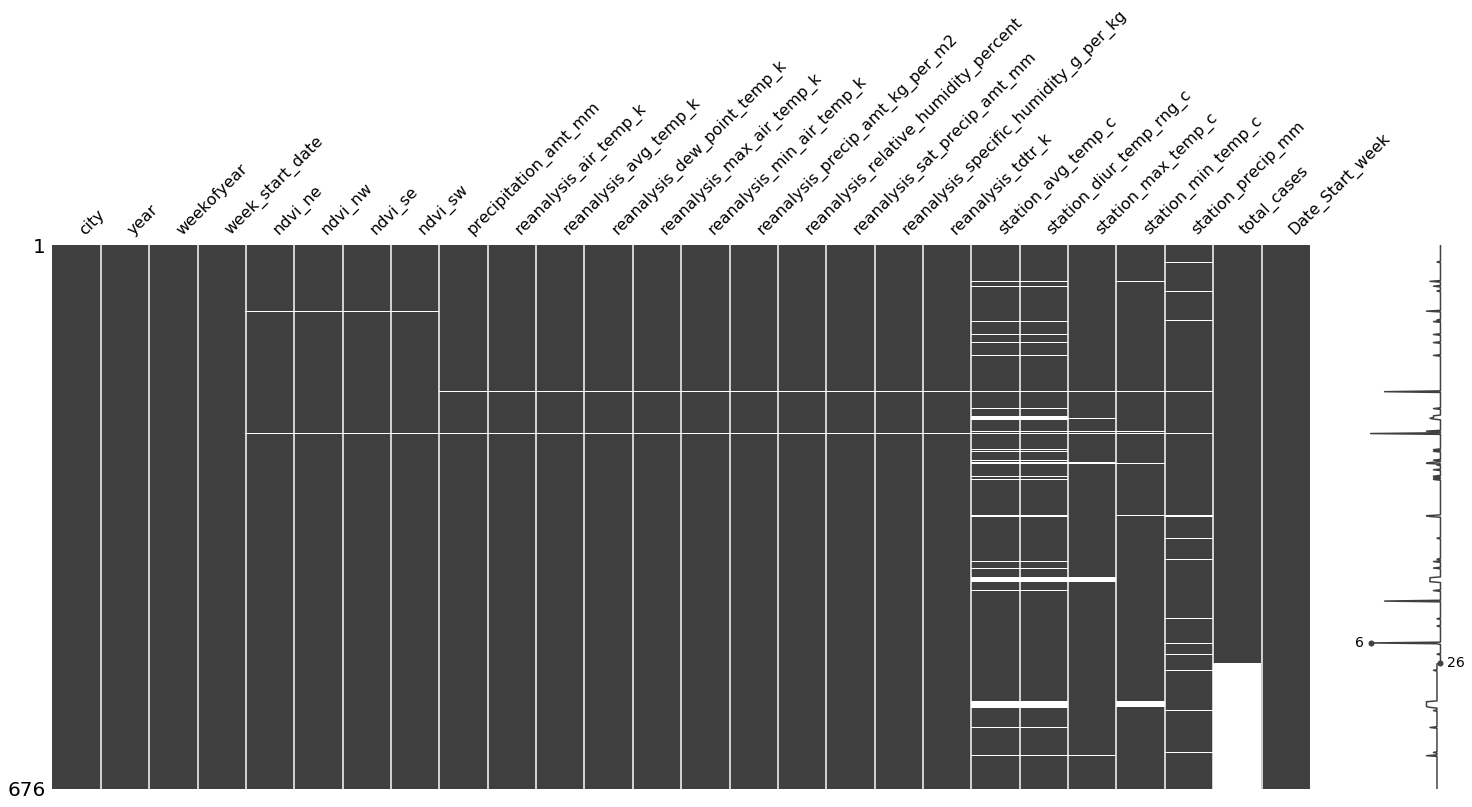

In [16]:
import missingno as msno
msno.matrix(df_TOTAL[df_TOTAL['city']=='sj'])
plt.show()

msno.matrix(df_TOTAL[df_TOTAL['city']=='iq'])
plt.show()

* el mes inteessant aqui es que hi han **algunes setmanes en les que falta tot** (en total deuen ser unes 10, perque son els Nans que hem vist als reanalisis). --> **Aquestes les eliminem i aixi seguim**.
* el que també es molt interessant es que **nomes una de les ciutats te mssing values per les variables de estacio meteo**
* Farem servir alguna de les variables reanalysis per localitzar la fila i eliminarles

In [17]:
# Aqui ara eliminem del dataframe les setmanes que tenen tot NaNs (son les mateixes que tenen reanalisis NAN)
id_drop= df_TOTAL[pd.isnull(df_TOTAL['reanalysis_air_temp_k'])].index.tolist()

#eliminem del datframe i dels labels
df_TOTAL = df_TOTAL.drop(id_drop,axis=0)



id_drop= train_values_df[pd.isnull(train_values_df['reanalysis_air_temp_k'])].index.tolist()

#eliminem del datframe i dels labels
train_values_df = train_values_df.drop(id_drop,axis=0)
train_labels_df = train_labels_df.drop(id_drop,axis=0)

##### les temperatures del reanalisi estan en Kelvin, les pasem a Celsius

In [18]:
# passem a ºC totes les que estan en K
df_TOTAL['reanalysis_air_temp_c']=df_TOTAL['reanalysis_air_temp_k'] - 273.15
df_TOTAL['reanalysis_max_air_temp_c']=df_TOTAL['reanalysis_max_air_temp_k'] - 273.15
df_TOTAL['reanalysis_min_air_temp_c']=df_TOTAL['reanalysis_min_air_temp_k'] - 273.15
df_TOTAL['reanalysis_dew_point_temp_c']=df_TOTAL['reanalysis_dew_point_temp_k'] - 273.15
df_TOTAL['reanalysis_tdtr_c']=df_TOTAL['reanalysis_tdtr_k'] - 273.15

##### al ser series temporals, els outliers poden jugar un paper important 

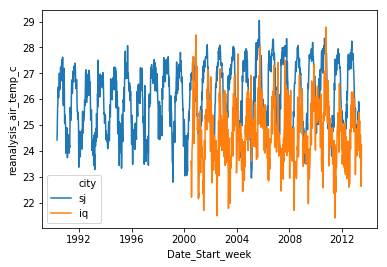

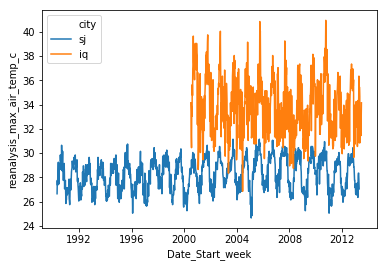

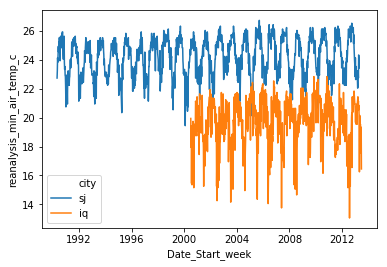

In [19]:
sns.lineplot(x='Date_Start_week',y='reanalysis_air_temp_c',hue='city',data=df_TOTAL)
plt.show()

sns.lineplot(x='Date_Start_week',y='reanalysis_max_air_temp_c',hue='city',data=df_TOTAL)
plt.show()

sns.lineplot(x='Date_Start_week',y='reanalysis_min_air_temp_c',hue='city',data=df_TOTAL)
plt.show()

Les series de reanalisis no semblen tenir outliers

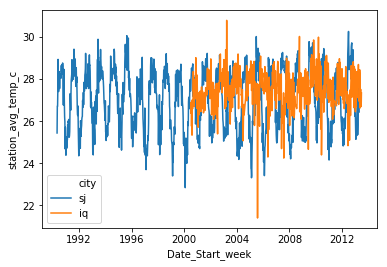

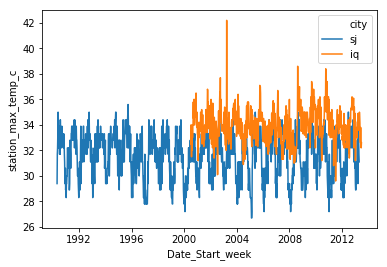

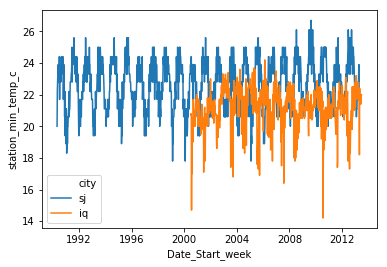

In [20]:
sns.lineplot(x='Date_Start_week',y='station_avg_temp_c',hue='city',data=df_TOTAL)
plt.show()

sns.lineplot(x='Date_Start_week',y='station_max_temp_c',hue='city',data=df_TOTAL)
plt.show()

sns.lineplot(x='Date_Start_week',y='station_min_temp_c',hue='city',data=df_TOTAL)
plt.show()

Vale, per ara no eliminem res, pero per iq algun punt podria ser un outlier (42ºC?). Ho tenim en compte per mes endavant

### mirem la relacio entre temperatures model i estacions (nomes mirem 'iq' perque l'altre ja esta complerta)
* tenir en compte que tenim dos ciutats!
* aixo ens ha de permetre veure si podem fer servir un com a predictor de l'altre

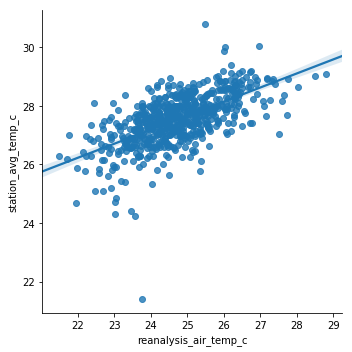

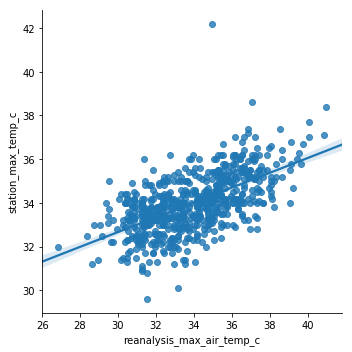

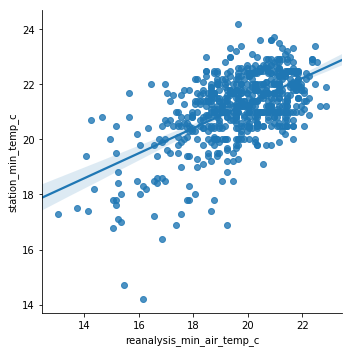

In [21]:
sns.lmplot(x="reanalysis_air_temp_c", y="station_avg_temp_c", data=df_TOTAL[df_TOTAL['city']=='iq']);
plt.show()

sns.lmplot(x="reanalysis_max_air_temp_c", y="station_max_temp_c", data=df_TOTAL[df_TOTAL['city']=='iq']);
plt.show()

sns.lmplot(x="reanalysis_min_air_temp_c", y="station_min_temp_c", data=df_TOTAL[df_TOTAL['city']=='iq']);
plt.show()

* per **iq** la relacio entre reanalysis i station sembla lineal --> la fem srvir per predir NaNs entre ells?

## omplim NaNs "iq" fent servir model regressio lineal
* en el grafics dels Nans hem vist que estan agrupats i son seguits, per tant no podem interpolar lienalment entre un i el següent

In [22]:
train_iq=df_TOTAL[df_TOTAL['city']=='iq']
# iq
id_missing= train_iq[pd.isnull(train_iq['station_avg_temp_c'])].index.tolist()
xx = train_iq['reanalysis_air_temp_c'].drop(id_missing,axis=0).values.reshape(-1,1)
yy=train_iq['station_avg_temp_c'].drop(id_missing,axis=0).values.reshape(-1,1)
xx_test=train_iq['reanalysis_air_temp_c'][id_missing].values.reshape(-1,1)

## 1) Omplim temperatura mitjana aplicant un model Lineal Rgeresion
- Farem servir dades del reanalisi per omplir forats de la station

Mean Square error: 0.5065357816415449


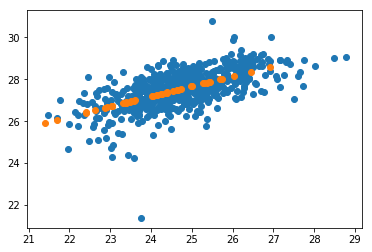

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

LR=LinearRegression()

results = cross_val_score(LR, xx, yy, cv=6, scoring='neg_mean_squared_error')
print('Mean Square error:',(-results.mean()))

#train model and predict
LR.fit(xx,yy)
pred=LR.predict(xx_test)

#fem un plot
plt.scatter(xx,yy)
plt.scatter(xx_test,pred)
plt.show()

# ho posem on toca
df_TOTAL['station_avg_temp_c'][id_missing] = pred[:,0]

#### repetim per maxim

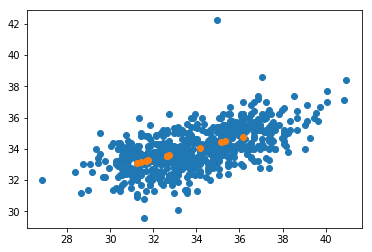

In [24]:
## repetim per maxim
id_missing= train_iq[pd.isnull(train_iq['station_max_temp_c'])].index.tolist()
xx = train_iq['reanalysis_max_air_temp_c'].drop(id_missing,axis=0).values.reshape(-1,1)
yy=train_iq['station_max_temp_c'].drop(id_missing,axis=0).values.reshape(-1,1)
xx_test=train_iq['reanalysis_max_air_temp_c'][id_missing].values.reshape(-1,1)

#predict
LR.fit(xx,yy)
pred=LR.predict(xx_test)

#plot
plt.scatter(xx,yy)
plt.scatter(xx_test,pred)
plt.show()

# ho posem on toca i fem un plot de la time series per veure com queda
df_TOTAL['station_max_temp_c'][id_missing] = pred[:,0]

#### repetim per minim

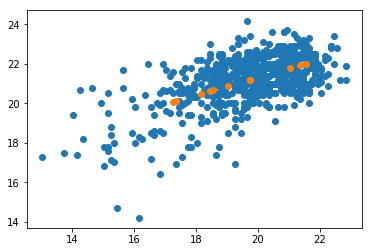

In [25]:
## repetim per minim
id_missing= train_iq[pd.isnull(train_iq['station_min_temp_c'])].index.tolist()
xx = train_iq['reanalysis_min_air_temp_c'].drop(id_missing,axis=0).values.reshape(-1,1)
yy=train_iq['station_min_temp_c'].drop(id_missing,axis=0).values.reshape(-1,1)
xx_test=train_iq['reanalysis_min_air_temp_c'][id_missing].values.reshape(-1,1)

#predict
LR.fit(xx,yy)
pred=LR.predict(xx_test)

#plot
plt.scatter(xx,yy)
plt.scatter(xx_test,pred)
plt.show()

# ho posem on toca i fem un plot de la time series per veure com queda
df_TOTAL['station_min_temp_c'][id_missing] = pred[:,0]

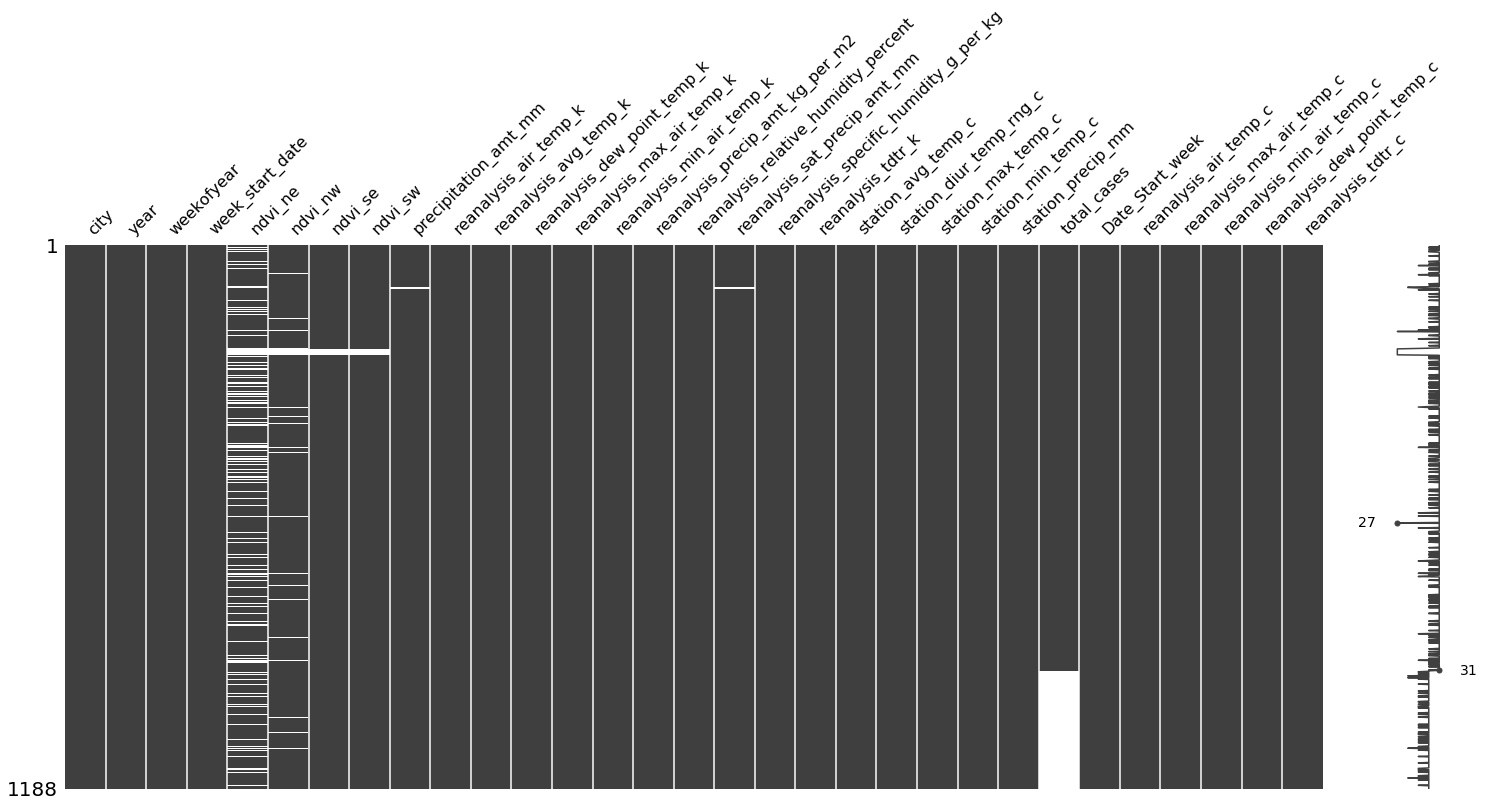

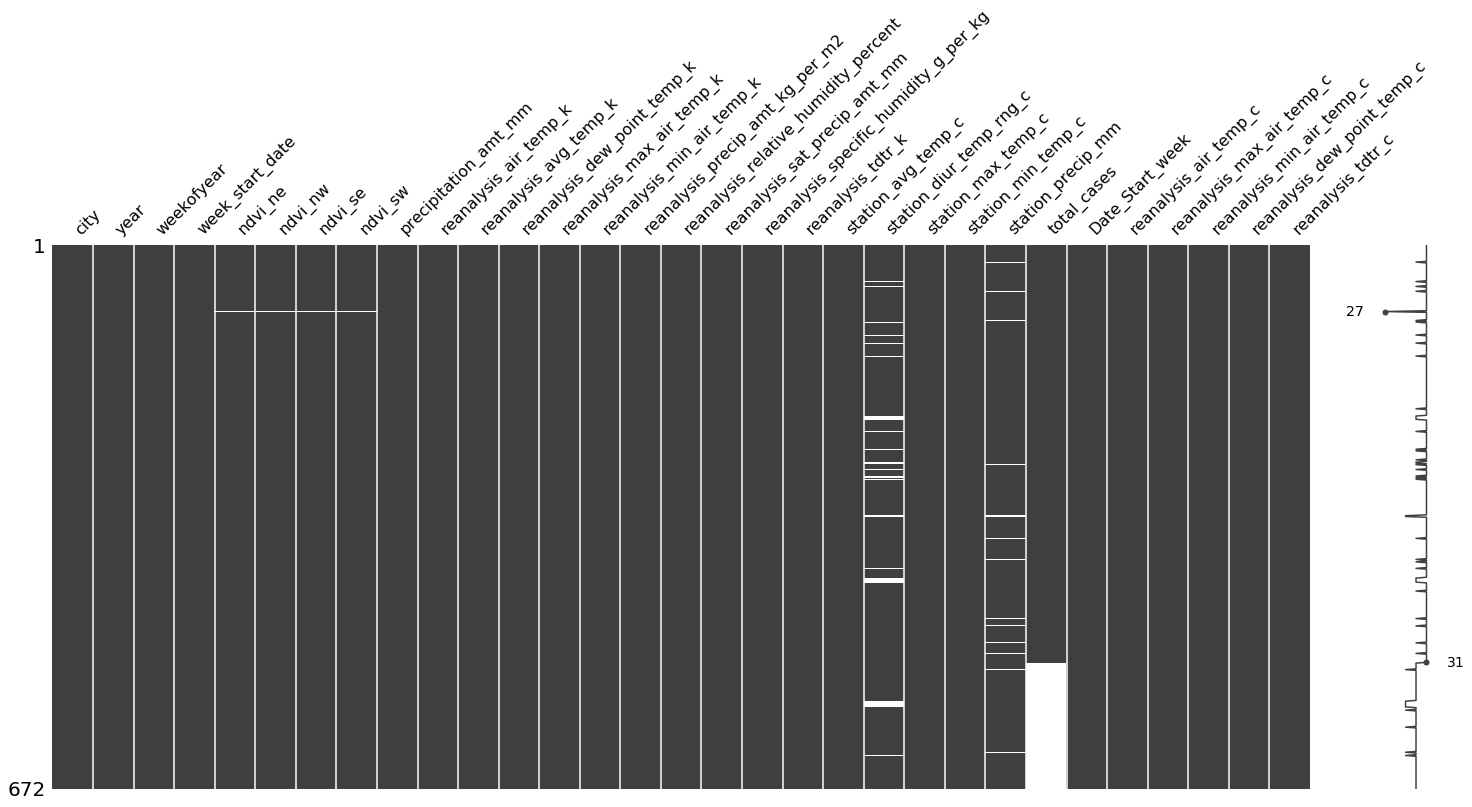

In [26]:
import missingno as msno
msno.matrix(df_TOTAL[df_TOTAL['city']=='sj'])
plt.show()

msno.matrix(df_TOTAL[df_TOTAL['city']=='iq'])
plt.show()

Ara ens queden Nans a iq en dues variables (encara no hem mirat el ndvi): la variacio diurna de temperatura i la precipitation
    1. jo faria: primer la preciptacio, la comparem amb les altres dues i veiem si les podem fer servir per omplir els valors
    2. despres faria un KNN per la variacio tenint en compte valors mitjans, maxims, minims i pluja.

## 2) Omplim Nans per Precipitation en 'Iq'

In [27]:
cor_iq=df_TOTAL[df_TOTAL['city']=='iq'].corr()
print ('Training correlations iq (Pearson): \n', cor_iq["station_precip_mm"].sort_values(ascending=False))

Training correlations iq (Pearson): 
 station_precip_mm                        1.000000
precipitation_amt_mm                     0.375729
reanalysis_sat_precip_amt_mm             0.375729
reanalysis_relative_humidity_percent     0.238721
station_min_temp_c                       0.192119
reanalysis_dew_point_temp_k              0.174966
reanalysis_dew_point_temp_c              0.174966
reanalysis_specific_humidity_g_per_kg    0.165308
reanalysis_precip_amt_kg_per_m2          0.121490
reanalysis_min_air_temp_k                0.099964
reanalysis_min_air_temp_c                0.099964
total_cases                              0.042976
ndvi_se                                  0.008220
ndvi_ne                                  0.001793
ndvi_sw                                 -0.015862
ndvi_nw                                 -0.041612
station_avg_temp_c                      -0.060640
weekofyear                              -0.062180
reanalysis_air_temp_k                   -0.126186
reanalysis_a

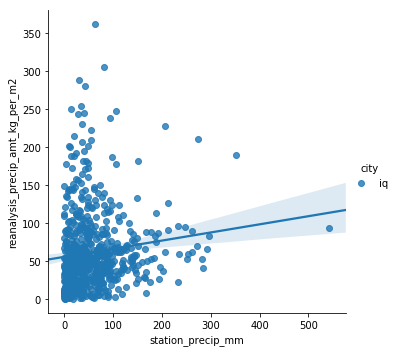

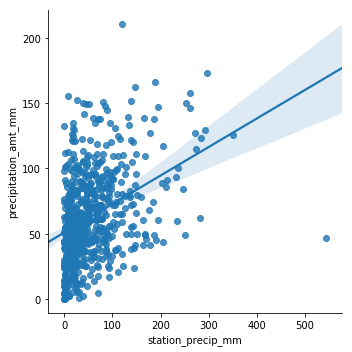

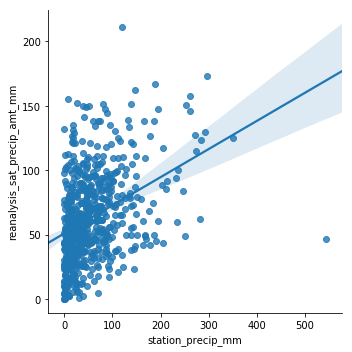

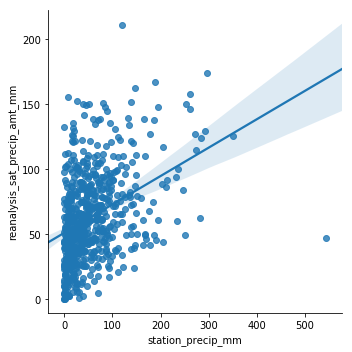

In [28]:
sns.lmplot(x="station_precip_mm", y="reanalysis_precip_amt_kg_per_m2", hue='city', data=df_TOTAL[df_TOTAL['city']=='iq']);
plt.show()

sns.lmplot(x="station_precip_mm", y="precipitation_amt_mm", data=df_TOTAL[df_TOTAL['city']=='iq']);
plt.show()

sns.lmplot(x="station_precip_mm", y="reanalysis_sat_precip_amt_mm", data=df_TOTAL[df_TOTAL['city']=='iq']);
plt.show()

sns.lmplot(x="station_precip_mm", y="reanalysis_sat_precip_amt_mm", data=df_TOTAL[df_TOTAL['city']=='iq']);
plt.show()

Aqui hem provat diferents coses per omplir els Nans, no les posem perque no fa falta pero les explico:
* aplicar models per predir station_precipitation a partir d'altres variables complertes --> el millor resultat ha estat per un model Ridge amb error absolut de 42.6 (Knn mes alt)
* posar el valor promitg de la columna (error de 45)
* posar el valor de precipitation_amt_mm --> el resultat es igual que el metode amb Ridge utilitzant aquest de predictor
(ens quedem amb aixo **facil i senzill**)


A part, per ciutat 'sj', hi han alguns NaNs per precipitation_amt_mm i reanalisis_amt. Mirant les altres dues features de precipitation, veiem que la que te mes relacio es la reanalysis_precip_amt_kg_per_m2. La farem servir per imputar NaNs

**pendent veure si aixo es pot millorar**


In [29]:
id_missing= df_TOTAL[pd.isnull(df_TOTAL['station_precip_mm'])].index.tolist()
df_TOTAL['station_precip_mm'][id_missing]= df_TOTAL.loc[id_missing]['precipitation_amt_mm'].values

id_missing= df_TOTAL[pd.isnull(df_TOTAL['precipitation_amt_mm'])].index.tolist()
df_TOTAL['precipitation_amt_mm'][id_missing]= df_TOTAL.loc[id_missing]['reanalysis_precip_amt_kg_per_m2'].values
df_TOTAL['reanalysis_sat_precip_amt_mm'][id_missing]= df_TOTAL.loc[id_missing]['reanalysis_precip_amt_kg_per_m2'].values

#### ara per 'iq' nomes ens queda completar la variacio diurna de temperatura
mirem correlacions lineals.
* podem fre-ho complicat i aplicar model de regressio amb variables amb mes 0.5 de correlacio (per exemple) --> Ridgle
* podem fer una correlacio lineal tal qual (lineal regression nomes amb la station_max_temp_rng_c) --> 0.66 de correlacio

Fent LR nomes amb una variable dona un error de 0.9. Fent Ridge amb mes d'una tenim error absolut de 0.8. Fem aquest.

In [30]:
print ('Training correlations iq (Pearson): \n', cor_iq["station_diur_temp_rng_c"].sort_values(ascending=False))

Training correlations iq (Pearson): 
 station_diur_temp_rng_c                  1.000000
station_max_temp_c                       0.672301
reanalysis_max_air_temp_k                0.596343
reanalysis_max_air_temp_c                0.596343
reanalysis_tdtr_k                        0.596003
reanalysis_tdtr_c                        0.596003
reanalysis_avg_temp_k                    0.531545
reanalysis_air_temp_c                    0.524008
reanalysis_air_temp_k                    0.524008
station_avg_temp_c                       0.491736
weekofyear                               0.293743
ndvi_nw                                  0.205714
ndvi_sw                                  0.172087
ndvi_se                                  0.164970
ndvi_ne                                  0.162648
reanalysis_min_air_temp_c               -0.054072
reanalysis_min_air_temp_k               -0.054072
year                                    -0.057767
total_cases                             -0.058230
reanalysis_p

In [31]:
df_iq = df_TOTAL[df_TOTAL['city']=='iq'] # aixo te train i test eh

features_train_num_test = ['station_diur_temp_rng_c','station_max_temp_c','reanalysis_max_air_temp_c','reanalysis_relative_humidity_percent','reanalysis_tdtr_k']
features_train_num_test_X =  ['station_max_temp_c','reanalysis_max_air_temp_c','reanalysis_relative_humidity_percent','reanalysis_tdtr_k']
train_rain0=df_iq.loc[:,features_train_num_test]

In [32]:
## repetim per minim
id_missing= train_rain0[pd.isnull(train_rain0['station_diur_temp_rng_c'])].index.tolist()

xx = train_rain0[features_train_num_test_X].drop(id_missing,axis=0).values

yy=train_rain0['station_diur_temp_rng_c'].drop(id_missing,axis=0).values.reshape(-1,1)

xx_test=train_rain0.loc[id_missing][features_train_num_test_X].values

from sklearn.linear_model import Ridge

Rlin= Ridge()

results = cross_val_score(Rlin, xx, yy, cv=6, scoring='neg_mean_absolute_error')
print('Mean absolute error Ridge:',(-results.mean()))

Mean absolute error Ridge: 0.7912942497060079


In [33]:
# error posant el valor promitg seria....
np.abs(df_iq['station_diur_temp_rng_c'] - df_iq['station_diur_temp_rng_c'].mean()).mean()

1.231635809567332

In [34]:
#predict
Rlin.fit(xx,yy)
pred=Rlin.predict(xx_test)


# ho posem on toca i fem un plot de la time series per veure com queda
df_iq['station_diur_temp_rng_c'][id_missing] = pred[:,0]

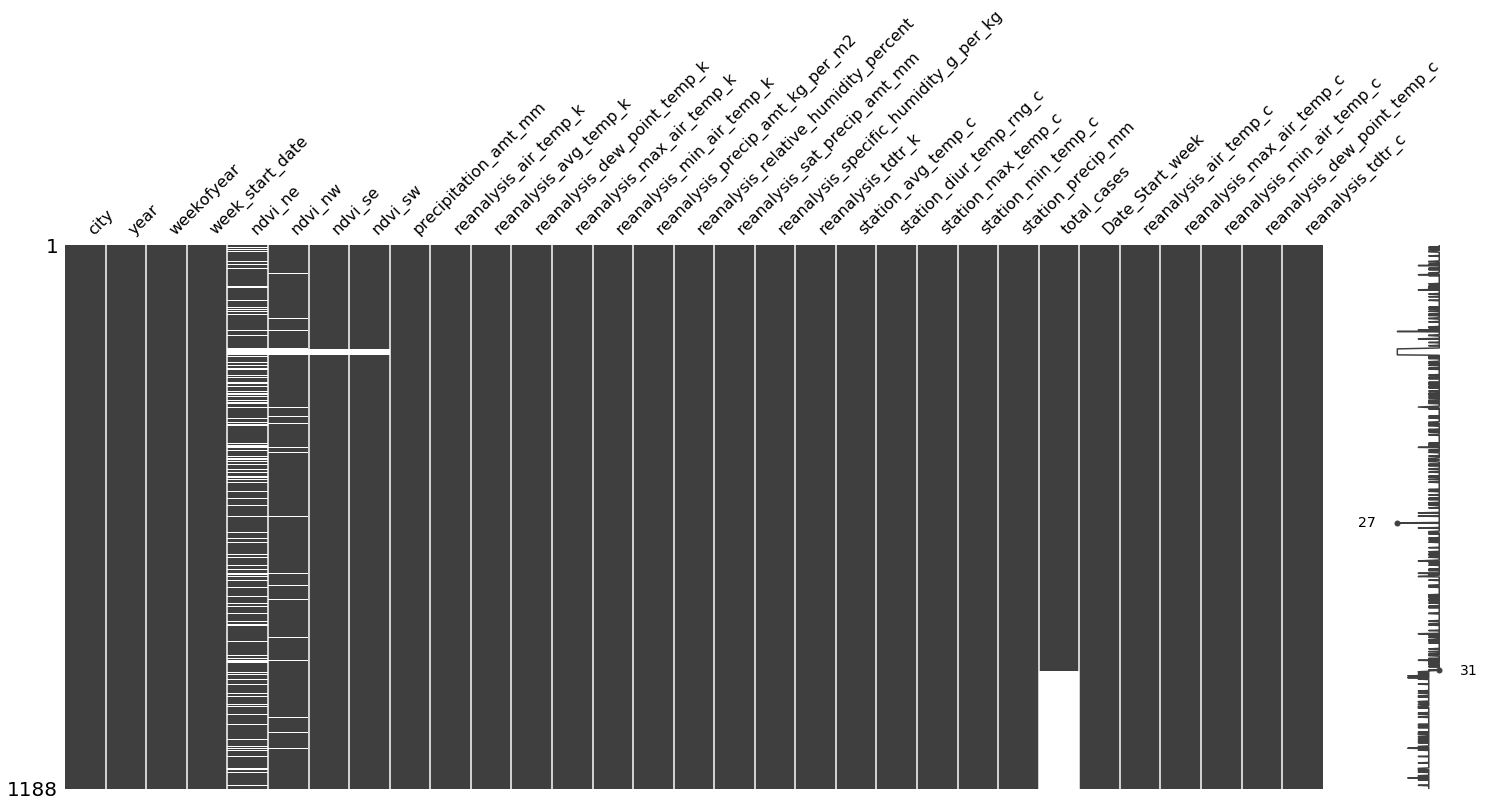

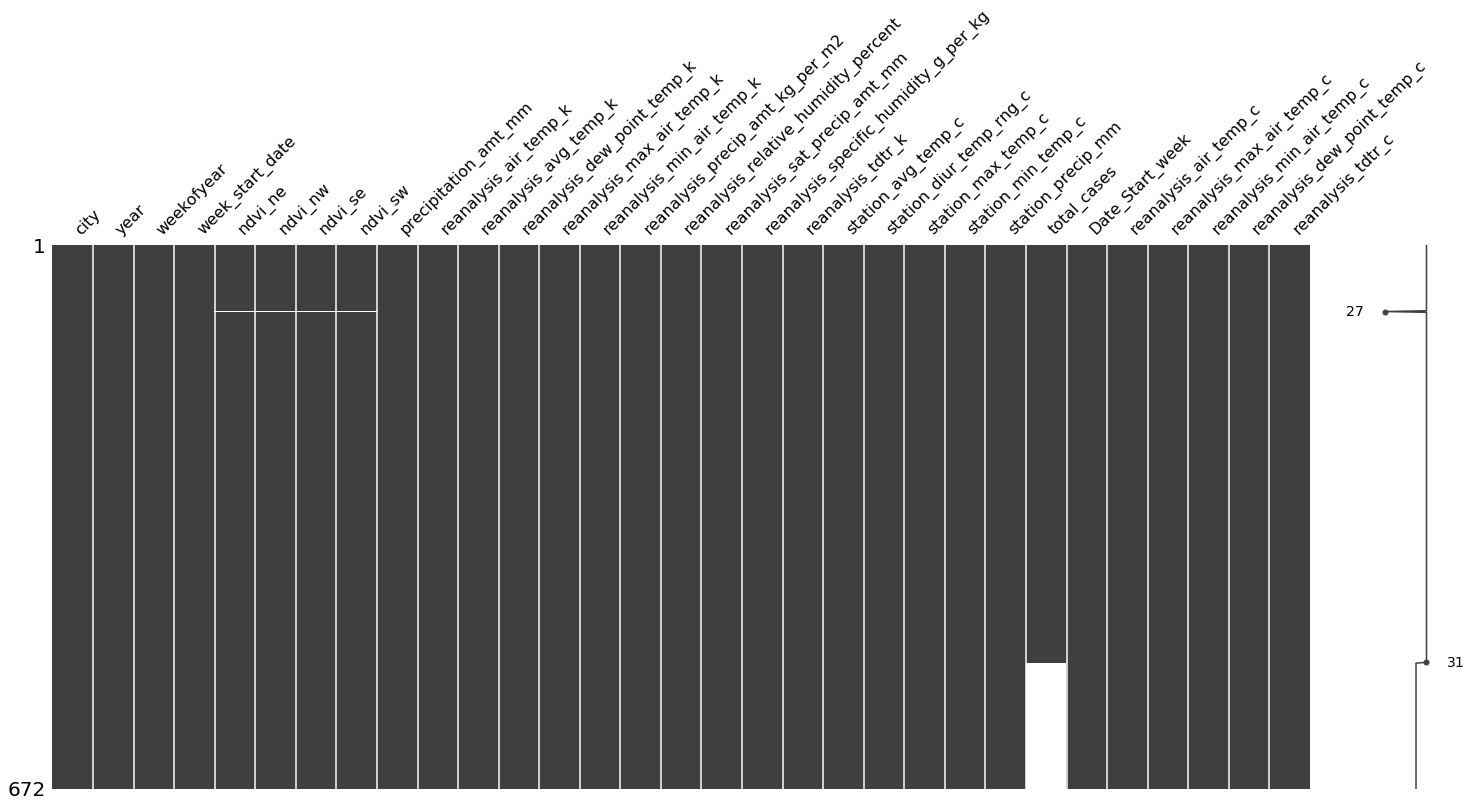

In [35]:
import missingno as msno
msno.matrix(df_TOTAL[df_TOTAL['city']=='sj'])
plt.show()

msno.matrix(df_iq)
plt.show()

#### separem dataframes i tornem a train i test, 
1. eliminem **ndvi** de SJ
2. ndvi en IQ simplemnet posem el valor promitg a la fila amb NaNs (mirem distribucio, segueix una normal, podem posar valor promitj)
2. fem primera aproximacio de models

## IQ

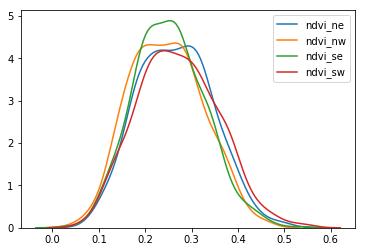

In [36]:
sns.kdeplot(df_iq['ndvi_ne'])
sns.kdeplot(df_iq['ndvi_nw'])
sns.kdeplot(df_iq['ndvi_se'])
sns.kdeplot(df_iq['ndvi_sw'])
plt.show()

id_missing= df_iq[pd.isnull(df_iq['ndvi_ne'])].index.tolist()
df_iq['ndvi_ne'][id_missing]= df_iq['ndvi_ne'].mean()
df_iq['ndvi_nw'][id_missing]= df_iq['ndvi_nw'].mean()
df_iq['ndvi_se'][id_missing]= df_iq['ndvi_se'].mean()
df_iq['ndvi_sw'][id_missing]= df_iq['ndvi_sw'].mean()

In [37]:
# Eliminem features repetides (K) i dates
df_iq = df_iq.drop(['week_start_date','reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k','reanalysis_tdtr_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k','Date_Start_week'],axis=1)

# per tornar a train i test, fem servir els labels (NaNs son test)
id_missing= df_iq[pd.isnull(df_iq['total_cases'])].index.tolist()

df_iq_train = df_iq.drop(id_missing,axis=0)
df_iq_test = df_iq.loc[id_missing]
df_iq_test = df_iq_test.drop(columns='total_cases')
df_iq_labels = train_labels_df[train_labels_df['city']=='iq']

In [38]:
df_iq.columns

Index(['city', 'year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'station_avg_temp_c',
       'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c',
       'station_precip_mm', 'total_cases', 'reanalysis_air_temp_c',
       'reanalysis_max_air_temp_c', 'reanalysis_min_air_temp_c',
       'reanalysis_dew_point_temp_c', 'reanalysis_tdtr_c'],
      dtype='object')

In [39]:
df_iq_train.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,...,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,reanalysis_air_temp_c,reanalysis_max_air_temp_c,reanalysis_min_air_temp_c,reanalysis_dew_point_temp_c,reanalysis_tdtr_c
936,iq,2000,26,0.192886,0.132257,0.340886,0.247200,25.41,43.19,92.418571,...,10.775000,32.5,20.7,3.0,0.0,23.590000,34.15,19.95,22.034286,-264.221429
937,iq,2000,27,0.216833,0.276100,0.289457,0.241657,60.61,46.00,93.581429,...,11.566667,34.0,20.8,55.6,0.0,23.484286,33.45,17.95,22.208571,-262.835714
938,iq,2000,28,0.176757,0.173129,0.204114,0.128014,55.52,64.77,95.848571,...,11.466667,33.0,20.7,38.1,0.0,23.265714,31.35,19.45,22.472857,-265.764286
939,iq,2000,29,0.227729,0.145429,0.254200,0.200314,5.60,23.96,87.234286,...,10.533333,31.5,14.7,30.0,0.0,22.207143,30.45,15.45,19.647143,-264.035714
940,iq,2000,30,0.328643,0.322129,0.254371,0.361043,62.76,31.80,88.161429,...,11.480000,33.3,19.1,4.0,0.0,23.282857,33.85,18.35,20.807143,-263.650000


## SJ

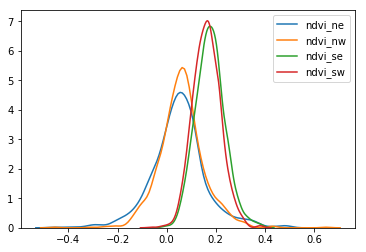

In [49]:
df_sj = df_TOTAL[df_TOTAL['city']=='sj'] # aixo te train i test eh

sns.kdeplot(df_sj['ndvi_ne'])
sns.kdeplot(df_sj['ndvi_nw'])
sns.kdeplot(df_sj['ndvi_se'])
sns.kdeplot(df_sj['ndvi_sw'])
plt.show()


id_missing= df_sj[pd.isnull(df_sj['ndvi_ne'])].index.tolist()
df_sj['ndvi_ne'][df_sj[pd.isnull(df_sj['ndvi_ne'])].index.tolist()]= df_sj['ndvi_ne'].mean()
df_sj['ndvi_nw'][df_sj[pd.isnull(df_sj['ndvi_nw'])].index.tolist()]= df_sj['ndvi_nw'].mean()
df_sj['ndvi_se'][df_sj[pd.isnull(df_sj['ndvi_se'])].index.tolist()]= df_sj['ndvi_se'].mean()
df_sj['ndvi_sw'][df_sj[pd.isnull(df_sj['ndvi_sw'])].index.tolist()]= df_sj['ndvi_sw'].mean()

In [50]:
# ara fem df_sj

df_sj = df_sj.drop(['week_start_date','reanalysis_air_temp_k','ndvi_ne','ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k','reanalysis_tdtr_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k','Date_Start_week'],axis=1)

# per tornar a train i test, fem servir els labels (NaNs son test)
id_missing= df_sj[pd.isnull(df_sj['total_cases'])].index.tolist()

df_sj_train = df_sj.drop(id_missing,axis=0)
df_sj_test = df_sj.loc[id_missing]
df_sj_test = df_sj_test.drop(columns='total_cases')
df_sj_labels = train_labels_df[train_labels_df['city']=='sj']

df_sj.columns

Index(['city', 'year', 'weekofyear', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'station_avg_temp_c',
       'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c',
       'station_precip_mm', 'total_cases', 'reanalysis_air_temp_c',
       'reanalysis_max_air_temp_c', 'reanalysis_min_air_temp_c',
       'reanalysis_dew_point_temp_c', 'reanalysis_tdtr_c'],
      dtype='object')

# Apliquem models i veiem que en treiem
 * Amb totes les dades
 * Sense normalitzar ni estandaritzar
 * Depres ja farem mes variacions

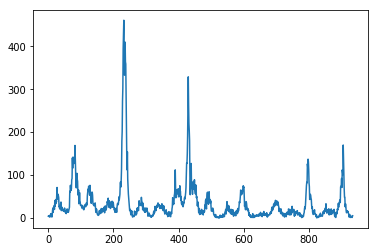

In [51]:
df_sj_labels['total_cases'].plot()
plt.show()

Hem de predir un valor, te pinta problema de regressio:
    * http://www.dartistics.com/modelling-intro.html
        1. models Lasso i Elasticnet
        2. Ridge Regression i SVR (Linear)
        3. SVR (rbf) / Ensemble Regressors
    * primer farem model per cada una de les ciutats --> entenem que van per separat? hauriem de veure com les tenim en compte les dues....(normalitzant valors?, per exemple?)
    

### prova per IQ

In [52]:
X_train=df_iq_train.drop(columns=['city','total_cases'])
y_train=df_iq_labels['total_cases'].values

In [53]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error


clfs = []
clfs.append(Lasso())
clfs.append(Ridge())
clfs.append(ElasticNet())
clfs.append(SVR(kernel='linear'))
clfs.append(SVR(kernel='rbf'))


for classifier in clfs:
    pipeline = Pipeline([ ('clf', Lasso())])
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train, scoring='neg_mean_absolute_error')
   
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

---------------------------------
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
-----------------------------------
fit_time  mean  0.0053323109944661455
fit_time  std  0.000471314409210715
score_time  mean  0.002001206080118815
score_time  std  0.0008176054173224228
test_score  mean  -7.262354451766281
test_score  std  1.0381859303890444
train_score  mean  -6.293163217029883
train_score  std  0.5028985747527257
---------------------------------
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
-----------------------------------
fit_time  mean  0.0063330332438151045
fit_time  std  0.0004704150352493203
score_time  mean  0.0016661485036214192
score_time  std  0.0004717642163377774
test_score  mean  -7.649889426636446
test_score  std  1.0232084019069951
train_score 

### prova per SJ (per ara aquest no te ndvi, hauriem de mirar d'inclore'ls)

1. he fet una prova posant els valors a partir de mitjana, i els resultats no varien gaire


In [54]:
X_train=df_sj_train.drop(columns=['city','total_cases'])
y_train=df_sj_labels['total_cases'].values

clfs = []
clfs.append(Lasso())
clfs.append(Ridge())
clfs.append(ElasticNet())
clfs.append(SVR(kernel='linear'))
clfs.append(SVR(kernel='rbf'))


for classifier in clfs:
    pipeline = Pipeline([ ('clf', Lasso())])
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train, scoring='neg_mean_absolute_error')
   
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

---------------------------------
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
-----------------------------------
fit_time  mean  0.010998805363972982
fit_time  std  0.000816245527261347
score_time  mean  0.0020018418629964194
score_time  std  9.602742174144245e-07
test_score  mean  -27.601159451344284
test_score  std  5.4272479962053
train_score  mean  -26.23289410163514
train_score  std  5.097139475574939
---------------------------------
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
-----------------------------------
fit_time  mean  0.004999955495198567
fit_time  std  0.0008171197619391852
score_time  mean  0.0026674270629882812
score_time  std  0.0009435838904502593
test_score  mean  -28.27287196622228
test_score  std  4.742339994163252
train_score  mean

* Els resultats son molt bon per Iq, i no gaire bons per SJ.

* En Iq hem tingut en compte l'index de vegertacio (ha millorat lleument, de 6.7 a 6.3 aprox)

* Per ara els millors resulatst son: SVR(linear i rbf) !!

* Els esforços han d'anar per predir SJ

* No hem fet res de hyperparametres encara (imagino pot millorar bastant la cosa)

In [79]:
model = SVR(kernel='linear', C=1)
scores = cross_validate(model, X_train, y_train, scoring='neg_mean_absolute_error')

In [80]:
for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

fit_time  mean  1.2059487501780193
fit_time  std  0.254149799492905
score_time  mean  0.006323178609212239
score_time  std  0.0004571528272100196
test_score  mean  -23.538136702037956
test_score  std  7.4171256935786545
train_score  mean  -21.734543043898153
train_score  std  3.7223294557394593
